# Data Visualisation J Component

# Team Members-

# Devang Mehrotra (18BCE0763)

# Chitresh Kansal (18BCE0760)

# Uday Agarwal (18BCE0777)

In [111]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import collections

In [112]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
pd.options.display.max_columns = 999
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

In [113]:
dataset = pd.read_csv('epldata_final.csv')
dataset['fpl_ratio'] = pd.DataFrame(dataset['fpl_points']/dataset['fpl_value'])
dataset.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,fpl_ratio
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0,22.000000
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0,17.578947
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0,24.363636
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0,16.266667
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0,20.166667


In [114]:
dataset['fpl_sel'] = dataset['fpl_sel'].replace('%','',regex=True).astype('float')/100
dataset.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,fpl_ratio
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,0.171,264,3.0,Chile,0,4,1,1,0,22.000000
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,0.056,167,2.0,Germany,0,4,1,1,0,17.578947
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,0.059,134,2.0,Czech Republic,0,6,1,1,0,24.363636
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,0.015,122,1.0,England,0,4,1,1,0,16.266667
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.007,121,2.0,France,0,4,1,1,0,20.166667


In [115]:
dataset=dataset.replace("Northern Ireland","United Kingdom")
dataset=dataset.replace("England","United Kingdom")
dataset=dataset.replace("Wales","United Kingdom")
dataset=dataset.replace("Scotland","United Kingdom")
dataset=dataset.replace("United Kingdom","United Kingdom of Great Britain and Northern Ireland")

In [116]:
dataset.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,fpl_ratio
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,0.171,264,3.0,Chile,0,4,1,1,0,22.000000
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,0.056,167,2.0,Germany,0,4,1,1,0,17.578947
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,0.059,134,2.0,Czech Republic,0,6,1,1,0,24.363636
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,0.015,122,1.0,United Kingdom of Great Britain and Northern I...,0,4,1,1,0,16.266667
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.007,121,2.0,France,0,4,1,1,0,20.166667


In [117]:
import random
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

### Number of Premier League players according to Position

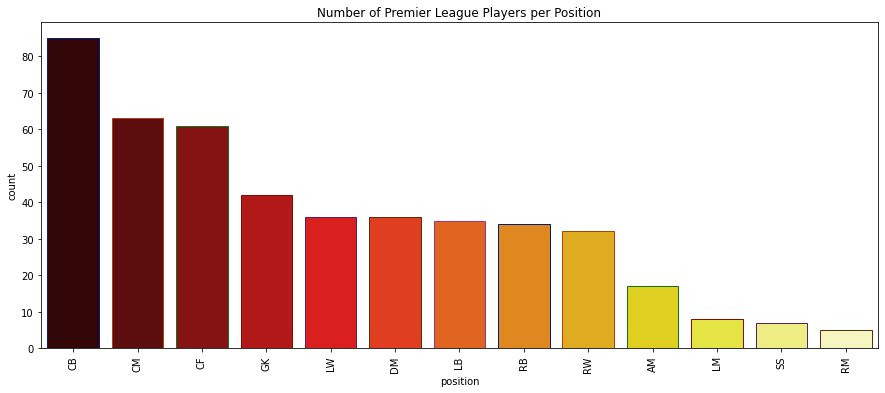

In [118]:
plt.subplots(figsize=(15,6))
sns.countplot('position',data=dataset,palette='hot',edgecolor=sns.color_palette('dark',7),order=dataset['position'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Premier League Players per Position')
plt.show()

### Number Of Players in Clubs based on Position

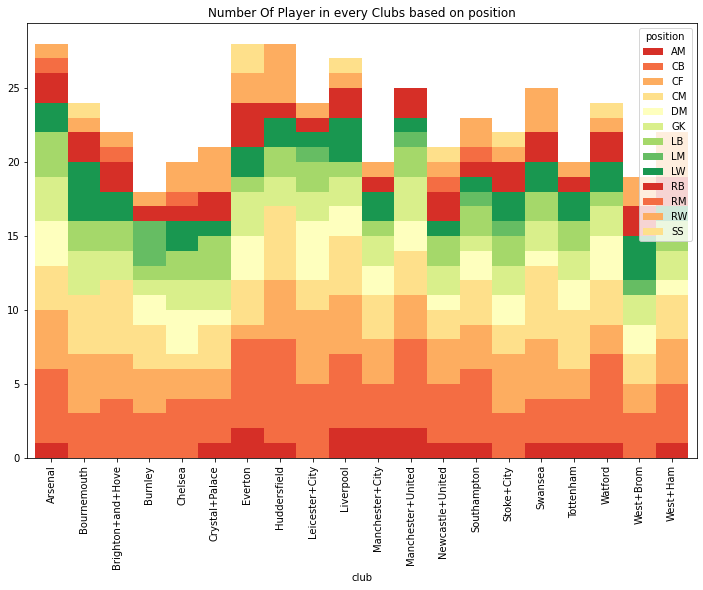

In [119]:
pd.crosstab(dataset.club,dataset.position).plot.bar(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.title('Number Of Player in every Clubs based on position')
plt.show()

### Top 10 Players according to their Market Value

In [120]:
datasetmarketv = dataset.nlargest(10, 'market_value').sort_values('market_value',ascending=False)
datasetmarketv

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,fpl_ratio
92,Eden Hazard,Chelsea,26,LW,1,75.0,4220,10.5,0.023,224,2.0,Belgium,0,3,5,1,0,21.333333
263,Paul Pogba,Manchester+United,24,CM,2,75.0,7435,8.0,0.195,115,2.0,France,0,2,12,1,1,14.375000
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,0.171,264,3.0,Chile,0,4,1,1,0,22.000000
240,Kevin De Bruyne,Manchester+City,26,AM,1,65.0,2252,10.0,0.175,199,2.0,Belgium,0,3,11,1,0,19.900000
241,Sergio Aguero,Manchester+City,29,CF,1,65.0,4046,11.5,0.097,175,3.0,Argentina,0,4,11,1,0,15.217391
377,Harry Kane,Tottenham,23,CF,1,60.0,4161,12.5,0.351,224,1.0,United Kingdom of Great Britain and Northern I...,0,2,17,1,0,17.920000
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,0.056,167,2.0,Germany,0,4,1,1,0,17.578947
93,Diego Costa,Chelsea,28,CF,1,50.0,4454,10.0,0.030,196,2.0,Spain,0,4,5,1,0,19.600000
104,N%27Golo Kante,Chelsea,26,DM,2,50.0,4042,5.0,0.138,83,2.0,France,0,3,5,1,1,16.600000
260,Romelu Lukaku,Manchester+United,24,CF,1,50.0,3727,11.5,0.450,221,2.0,Belgium,0,2,12,1,0,19.217391


In [121]:
data = [go.Bar(
    x = datasetmarketv.name,
    y = datasetmarketv.market_value,
    marker = dict(color = random_colors(10))
)]
layout = dict(title= "Top 10 PL players according to Market Value")
fig = dict( data=data, layout=layout )
iplot( fig, validate=False )

### Distribution of Players according to Age

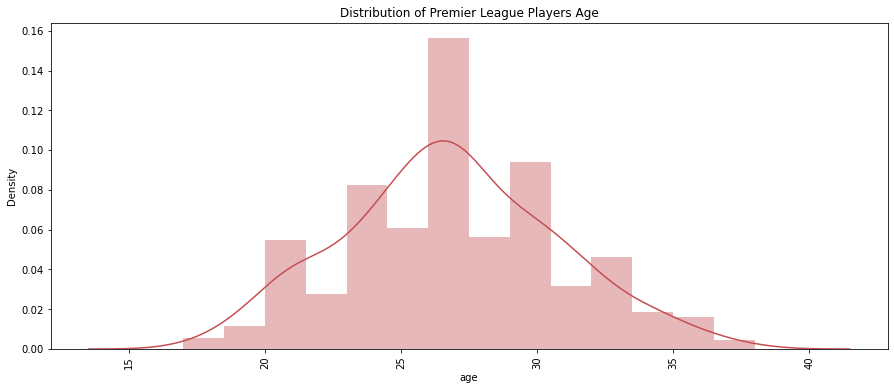

In [122]:
plt.subplots(figsize=(15,6))
sns.set_color_codes()
sns.distplot(dataset['age'], color = "R")
plt.xticks(rotation=90)
plt.title('Distribution of Premier League Players Age')
plt.show()

### Average of Market Value of Players in each Club

In [123]:
dataset_meanmv=pd.DataFrame(dataset.groupby(['club'])['market_value'].mean()).reset_index().sort_values('market_value',ascending=False)
dataset_meanmv

,club,market_value
10,Manchester+City,28.200000
4,Chelsea,27.677500
16,Tottenham,23.000000
11,Manchester+United,20.564000
0,Arsenal,19.642857
9,Liverpool,16.314815
6,Everton,10.098214
13,Southampton,10.000000
19,West+Ham,8.818182
8,Leicester+City,8.645833


In [124]:
data = [go.Bar(
    x = dataset_meanmv.club,
    y = dataset_meanmv.market_value,
    marker = dict(color = random_colors(20))
)]
layout = dict(title= "Average of Market Value")
fig = dict( data=data, layout=layout )
iplot( fig, validate=False )

In [125]:
trace = go.Pie(labels=dataset_meanmv.club, values=dataset_meanmv.market_value, hole=0.6,textinfo= "none")
layout = go.Layout(title='Average of Market Value')
fig = go.Figure(data=[trace], layout=layout)
iplot(fig, filename="plotting-library")

### Most viewed Players

In [126]:
datasetview = dataset.nlargest(10, 'page_views').sort_values('page_views',ascending=False)
datasetview

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,fpl_ratio
143,Wayne Rooney,Everton,31,SS,1,15.0,7664,7.5,0.209,76,1.0,United Kingdom of Great Britain and Northern I...,0,4,7,0,0,10.133333
263,Paul Pogba,Manchester+United,24,CM,2,75.0,7435,8.0,0.195,115,2.0,France,0,2,12,1,1,14.375000
376,Dele Alli,Tottenham,21,CM,2,45.0,4626,9.5,0.386,225,1.0,United Kingdom of Great Britain and Northern I...,0,1,17,1,0,23.684211
93,Diego Costa,Chelsea,28,CF,1,50.0,4454,10.0,0.030,196,2.0,Spain,0,4,5,1,0,19.600000
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,0.056,167,2.0,Germany,0,4,1,1,0,17.578947
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,0.171,264,3.0,Chile,0,4,1,1,0,22.000000
251,Gabriel Jesus,Manchester+City,20,CF,1,30.0,4254,10.5,0.152,67,3.0,Brazil,0,1,11,1,1,6.380952
92,Eden Hazard,Chelsea,26,LW,1,75.0,4220,10.5,0.023,224,2.0,Belgium,0,3,5,1,0,21.333333
377,Harry Kane,Tottenham,23,CF,1,60.0,4161,12.5,0.351,224,1.0,United Kingdom of Great Britain and Northern I...,0,2,17,1,0,17.920000
241,Sergio Aguero,Manchester+City,29,CF,1,65.0,4046,11.5,0.097,175,3.0,Argentina,0,4,11,1,0,15.217391


In [127]:
data = [go.Bar(
    x = datasetview.name,
    y = datasetview.page_views,
    marker = dict(color = random_colors(20))
)]
layout = dict(title= "top 10 most viewed premier league player")
fig = dict( data=data, layout=layout )
iplot( fig, validate=False )

### Top 10 most Valuable Players according to FPL value

In [128]:
datasetview = dataset.nlargest(10, 'fpl_value').sort_values('fpl_value',ascending=False)
datasetview

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,fpl_ratio
377,Harry Kane,Tottenham,23,CF,1,60.0,4161,12.5,0.351,224,1.0,United Kingdom of Great Britain and Northern I...,0,2,17,1,0,17.920000
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,0.171,264,3.0,Chile,0,4,1,1,0,22.000000
241,Sergio Aguero,Manchester+City,29,CF,1,65.0,4046,11.5,0.097,175,3.0,Argentina,0,4,11,1,0,15.217391
260,Romelu Lukaku,Manchester+United,24,CF,1,50.0,3727,11.5,0.450,221,2.0,Belgium,0,2,12,1,0,19.217391
27,Alexandre Lacazette,Arsenal,26,CF,1,40.0,1183,10.5,0.265,0,2.0,France,1,3,1,1,0,0.000000
92,Eden Hazard,Chelsea,26,LW,1,75.0,4220,10.5,0.023,224,2.0,Belgium,0,3,5,1,0,21.333333
251,Gabriel Jesus,Manchester+City,20,CF,1,30.0,4254,10.5,0.152,67,3.0,Brazil,0,1,11,1,1,6.380952
93,Diego Costa,Chelsea,28,CF,1,50.0,4454,10.0,0.030,196,2.0,Spain,0,4,5,1,0,19.600000
240,Kevin De Bruyne,Manchester+City,26,AM,1,65.0,2252,10.0,0.175,199,2.0,Belgium,0,3,11,1,0,19.900000
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,0.056,167,2.0,Germany,0,4,1,1,0,17.578947


In [129]:
data = [go.Bar(
    x = datasetview.name,
    y = datasetview.fpl_value,
    marker = dict(color = random_colors(10))
)]
layout = dict(title= "Top 10 Most Valuable Players in FPL")
fig = dict( data=data, layout=layout )
iplot( fig, validate=False )

### Average of FPL Value in each Clubs

In [130]:
dataset_meanfv=pd.DataFrame(dataset.groupby(['club'])['fpl_value'].mean()).reset_index().sort_values('fpl_value',ascending=False)
dataset_meanfv

,club,fpl_value
10,Manchester+City,6.850000
4,Chelsea,6.525000
16,Tottenham,6.450000
0,Arsenal,6.303571
9,Liverpool,5.981481
11,Manchester+United,5.960000
6,Everton,5.482143
8,Leicester+City,5.354167
19,West+Ham,5.250000
13,Southampton,5.239130


In [131]:
data = [go.Bar(
    x = dataset_meanfv.club,
    y = dataset_meanfv.fpl_value,
    marker = dict(color = random_colors(20))
)]
layout = dict(title= "Average FPL value accoriding to each Club")
fig = dict( data=data, layout=layout )
iplot( fig, validate=False )

### Total Percentage of Users selecting a Club

In [132]:
dataset_meanfs=pd.DataFrame(dataset.groupby(['club'])['fpl_sel'].sum()/0.14956).reset_index().sort_values('fpl_sel',ascending=False)
dataset_meanfs

,club,fpl_sel
11,Manchester+United,10.336988
16,Tottenham,10.116341
4,Chelsea,9.019791
9,Liverpool,8.023536
0,Arsenal,7.374967
10,Manchester+City,7.154319
6,Everton,6.138005
1,Bournemouth,6.131319
5,Crystal+Palace,5.188553
13,Southampton,4.874298


In [133]:
trace = go.Pie(labels=dataset_meanfs.club, values=dataset_meanfs.fpl_sel, hole=0.6,textinfo= "none")
layout = go.Layout(title='Pie denoting FPL Selection share')
fig = go.Figure(data=[trace], layout=layout)
iplot(fig, filename="plotting-library")

### Relation between FPL points and FPL value 

In [135]:
dataset.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,fpl_ratio
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,0.171,264,3.0,Chile,0,4,1,1,0,22.000000
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,0.056,167,2.0,Germany,0,4,1,1,0,17.578947
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,0.059,134,2.0,Czech Republic,0,6,1,1,0,24.363636
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,0.015,122,1.0,United Kingdom of Great Britain and Northern I...,0,4,1,1,0,16.266667
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.007,121,2.0,France,0,4,1,1,0,20.166667


In [136]:
trace1 = {
  "x": dataset['fpl_value'],
  "y": dataset['fpl_points'],
  "marker": {
    "color": 'red',
    "size": dataset['fpl_ratio']
  }, 
  "mode": "markers", 
  "name": "fpl_points", 
  "text": dataset['name']+", Club:"+dataset['club']+", Pos:"+dataset['position'], 
  "type": "scatter"
  
}

In [137]:
data = [trace1]
layout = {
  "autosize": True, 
  "title": "Relation between FPL points and FPL value per Player",
  "xaxis": {
    "autorange": True, 
    "range": [3.48535752785, 13.0146424722], 
    "title": "FPL Value", 
    "type": "linear"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [-17.5245518316, 281.524551832], 
    "title": "FPL Points", 
    "type": "linear"
  }
}

In [138]:
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-scatter')

### Relation between FPL points and Age

In [139]:
trace1 = {
  "x": dataset['age'],
  "y": dataset['fpl_points'],
  "marker": {
    "color": 'red',
  }, 
  "mode": "markers", 
  "name": "fpl_points", 
  "text": dataset['name']+", Club:"+dataset['club']+", Pos:"+dataset['position'],
  "type": "scatter"
  
}

In [140]:
data = [trace1]
layout = {
  "autosize": True, 
  "hovermode": "closest",
  "title": "Relation between FPL Points and Player Age",
  "xaxis": {
    "autorange": True, 
    "range": [3.48535752785, 13.0146424722], 
    "title": "Player Age", 
    "type": "linear"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [-17.5245518316, 281.524551832], 
    "title": "FPL Points", 
    "type": "linear"
  }
}

In [141]:
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-scatter')

## Clustering on the basis of FPL Value and FPL Points using K - means clustering and getting efficient number of clusters using elbow method

In [142]:
df = pd.read_csv('epldata_final.csv')
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [143]:
X = df.iloc[:, [7, 9]].values

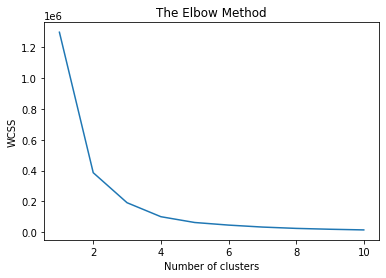

In [144]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [145]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

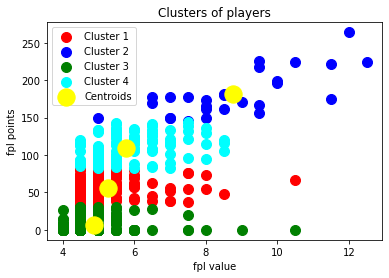

In [146]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('fpl value')
plt.ylabel('fpl points')
plt.legend()
plt.show()

### In the above we can observe cluster 1 & 2 give us the best players performing more and having reasonable value hence giving us a good pool of players to select from 

In [147]:
def give_player_Clust(i):
    print('Player {} belongs to cluster {}'.format(df.loc[i,'name'],y_kmeans[i]))

In [148]:
give_player_Clust(2)

Player Petr Cech belongs to cluster 3


### To futher make the pool of good players shorter applying HC

In [149]:
df['fpl_sel'] = df['fpl_sel'].replace('%','',regex=True).astype('float')/100

In [150]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,0.171,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,0.056,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,0.059,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,0.015,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.007,121,2.0,France,0,4,1,1,0


In [151]:
X_n = df.iloc[:, [1,2,3,4,5,6,7,8, 9,10,12,13,14,15,16]].values

In [152]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_n[:,0] = le.fit_transform(X_n[:,0])
X_n[:,2] = le.fit_transform(X_n[:,2])
print(X_n)

[[0 28 8 ... 1 1 0]
 [0 28 0 ... 1 1 0]
 [0 35 5 ... 1 1 0]
 ...
 [19 23 9 ... 20 0 0]
 [19 21 2 ... 20 0 1]
 [19 27 2 ... 20 0 0]]


In [153]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X_n)
X_std

array([[-1.63175378,  0.30200882,  1.04007511, ..., -1.63175378,
         1.51421833, -0.41237212],
       [-1.63175378,  0.30200882, -1.36934512, ..., -1.63175378,
         1.51421833, -0.41237212],
       [-1.63175378,  2.07076099,  0.13654252, ..., -1.63175378,
         1.51421833, -0.41237212],
       ...,
       [ 1.68977338, -0.96138559,  1.34125264, ...,  1.68977338,
        -0.66040675, -0.41237212],
       [ 1.68977338, -1.46674336, -0.76699006, ...,  1.68977338,
        -0.66040675,  2.42499423],
       [ 1.68977338,  0.04932993, -0.76699006, ...,  1.68977338,
        -0.66040675, -0.41237212]])

In [154]:
np.any(np.isnan(X))

False

In [155]:
X_f = np.nan_to_num(X_std) 

### Reducing dimensions 

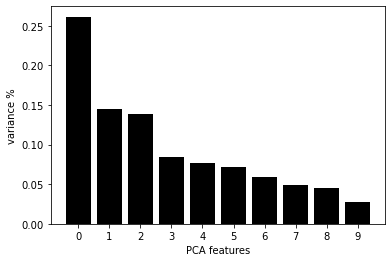

In [156]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_f)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

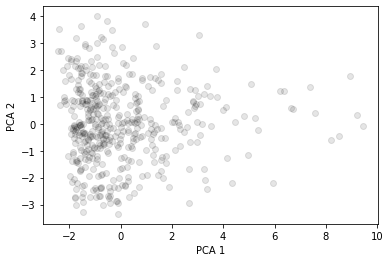

In [157]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

### Using dendogram to get ideal number of clusters 

In [158]:
import numpy as np
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_f)
PCA_components = pd.DataFrame(principalComponents)
X = PCA_components.iloc[:,[0,1,2]].values

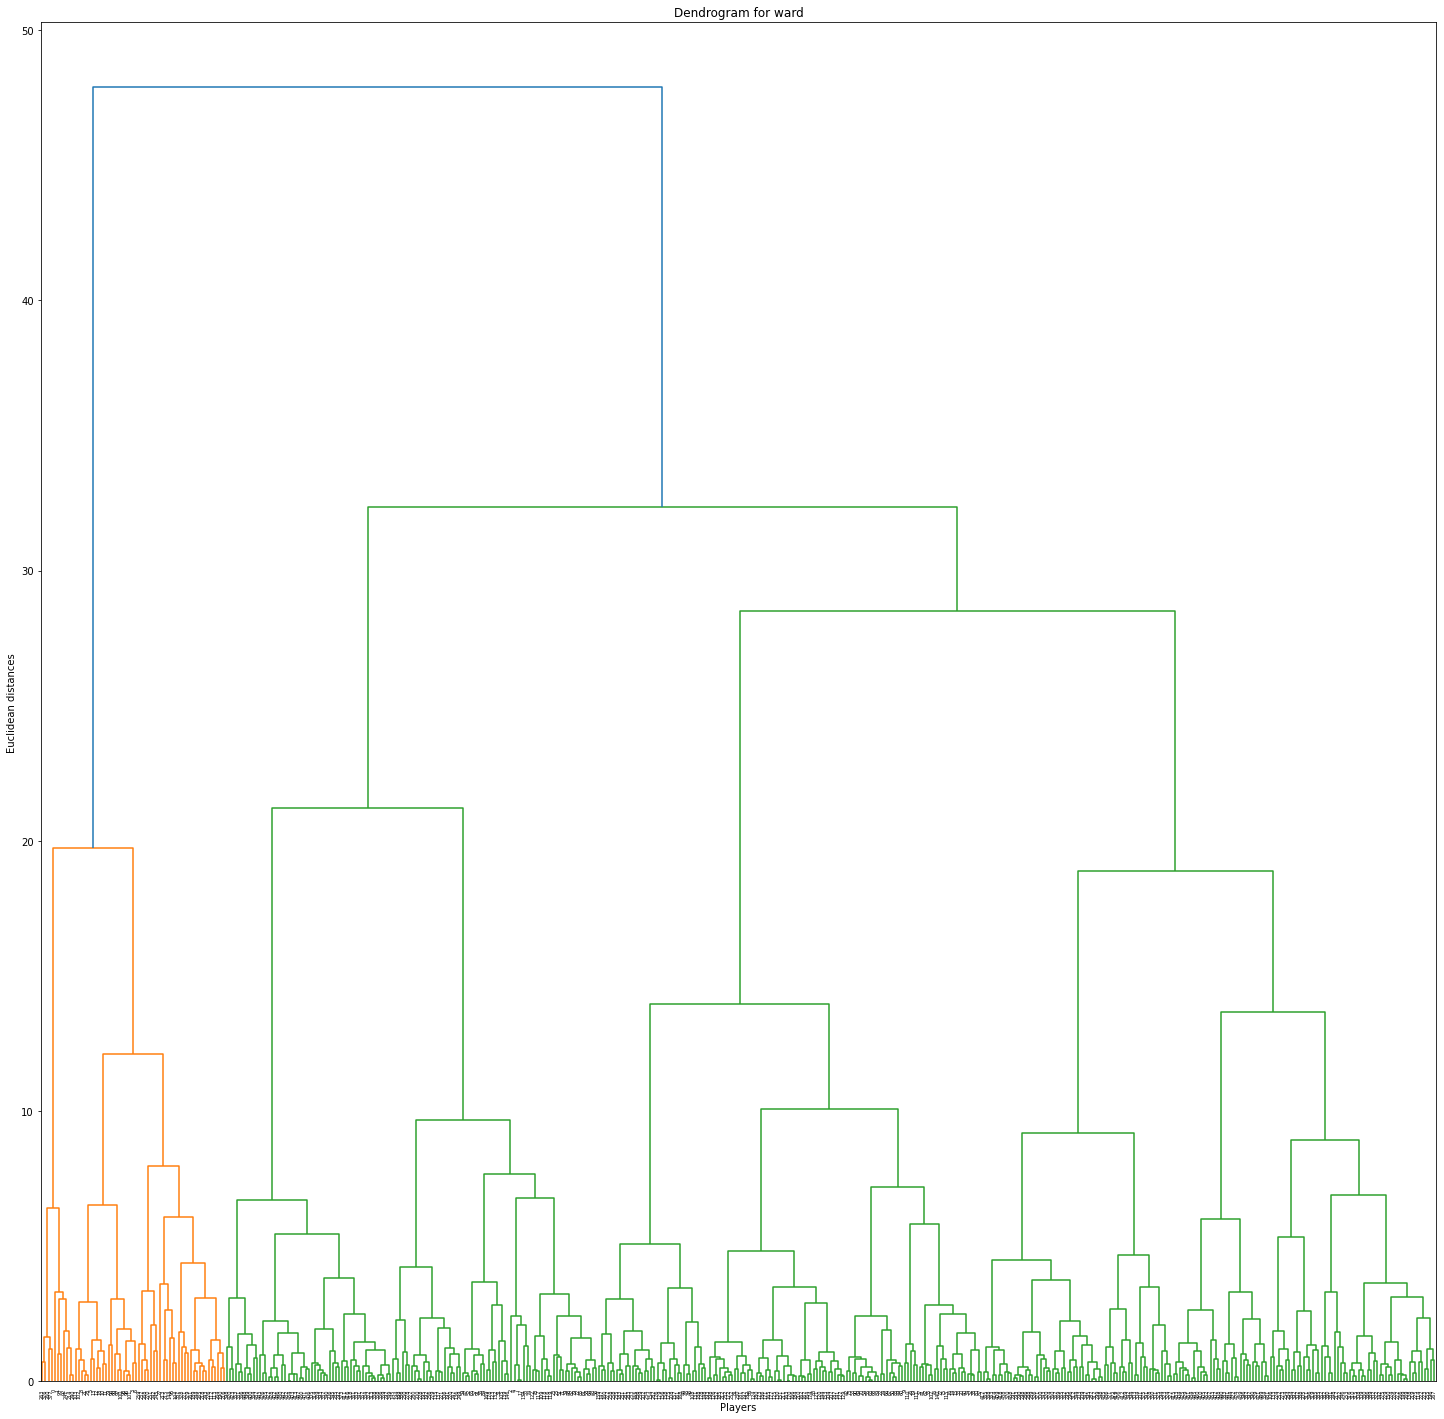

In [159]:
import scipy.cluster.hierarchy as sch
plt.subplots(figsize=(25, 25))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram for ward')
plt.xlabel('Players')
plt.ylabel('Euclidean distances')
plt.show()

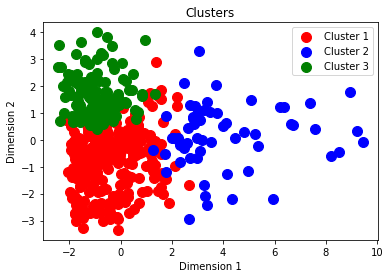

In [160]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
# plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'black', label = 'Cluster 6')
plt.title('Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

### The above cluster gives us an overall view of the players and can be used to filter out players from the k-means cluster 

In [161]:
c0 = 0
c1 = 0
c2 = 0
for i in range(len(y_kmeans)):
    if (y_kmeans[i] == 1) :
        if (y_hc[i] == 0):
            print('The player that belong to best cluster of k-means and also stand out in other cluster is \n')
            print(df.loc[i,'name'])
        elif (y_hc[i] == 1):
            c1 += 1
        else:
            c2 += 1


The player that belong to best cluster of k-means and also stand out in other cluster is 

Fernando Llorente


# Applying Machine Learning to predict Final Points

In [162]:
import json

In [163]:
fpl2020_file = open('FPL_2019_20_season_stats.jscsrc',encoding='utf-8')
fpl2020 = fpl2020_file.read()
fpl2020 = json.loads(fpl2020)
fpl2021_file = open('FPL_2020_21_player_list.jscsrc',encoding='utf-8')
fpl2021 = fpl2021_file.read()
fpl2021 = json.loads(fpl2021)

In [164]:
fpl2020.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [165]:
for key in fpl2020.keys():
    print('Data type: %s for Key: %s' %(type(fpl2020[key]),key))

Data type: <class 'list'> for Key: events
Data type: <class 'dict'> for Key: game_settings
Data type: <class 'list'> for Key: phases
Data type: <class 'list'> for Key: teams
Data type: <class 'int'> for Key: total_players
Data type: <class 'list'> for Key: elements
Data type: <class 'list'> for Key: element_stats
Data type: <class 'list'> for Key: element_types


In [166]:
print('Understanding the data structure for Teams')
print(fpl2020['teams'][0].keys())

Understanding the data structure for Teams
dict_keys(['code', 'draw', 'form', 'id', 'loss', 'name', 'played', 'points', 'position', 'short_name', 'strength', 'team_division', 'unavailable', 'win', 'strength_overall_home', 'strength_overall_away', 'strength_attack_home', 'strength_attack_away', 'strength_defence_home', 'strength_defence_away', 'pulse_id'])


In [167]:
print('Understanding the data structure for Elements')
print(fpl2020['elements'][0].keys())

Understanding the data structure for Elements
dict_keys(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code', 'cost_change_event', 'cost_change_event_fall', 'cost_change_start', 'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam', 'news', 'news_added', 'now_cost', 'photo', 'points_per_game', 'second_name', 'selected_by_percent', 'special', 'squad_number', 'status', 'team', 'team_code', 'total_points', 'transfers_in', 'transfers_in_event', 'transfers_out', 'transfers_out_event', 'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded', 'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat', 'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank', 'creativity_rank_type', 'threat_rank', 'threat_rank_type', 'ict_index_rank', '

In [168]:
teams2020 = pd.DataFrame(fpl2020['teams'])
players2020 = pd.DataFrame(fpl2020['elements'])
teams2020.head()

,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,14,None,1,10,Arsenal,38,56,8,ARS,4,None,False,14,1180,1240,1170,1170,1150,1200,1
1,7,8,None,2,21,Aston Villa,38,35,17,AVL,2,None,False,9,1020,1050,970,980,1000,1040,2
2,91,7,None,3,22,Bournemouth,38,34,18,BOU,2,None,False,9,1020,1020,990,1030,1000,1050,127
3,36,14,None,4,15,Brighton,38,41,15,BHA,2,None,False,9,1050,1010,1100,1100,1040,1030,131
4,90,9,None,5,14,Burnley,38,54,10,BUR,3,None,False,15,1110,1180,1130,1070,970,1110,43


In [169]:
players2020.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type
0,0.0,0.0,69140,0,0,-4,4,0,2,0.0,0.0,0,Shkodran,1.4,1,False,Hamstring injury - Unknown return date,2020-07-18T22:30:20.553834Z,51,69140.jpg,2.9,Mustafi,0.4,False,None,i,1,3,43,25007,0,47630,0,0.3,8.4,Mustafi,1205,0,2,4,17,0,0,0,2,0,0,2,242,277.2,45.5,155.0,47.9,257,100,352,122,234,58,313,106
1,100.0,100.0,98745,0,0,-3,3,0,2,2.3,2.1,0,Héctor,1.6,2,False,,2019-12-09T20:00:21.228098Z,52,98745.jpg,2.9,Bellerín,1.0,False,None,a,1,3,44,206616,0,159819,0,0.3,8.5,Bellerín,1156,1,0,4,18,0,0,0,2,0,0,4,204,187.8,76.9,103.0,37.0,322,124,301,95,275,81,339,122
2,100.0,100.0,111457,0,0,-3,3,0,2,3.3,3.1,1,Sead,2.6,3,False,,2020-02-23T18:30:13.672943Z,52,111457.jpg,2.1,Kolasinac,0.5,False,None,a,1,3,55,65194,0,134275,0,0.5,10.6,Kolasinac,1694,0,2,4,26,0,0,0,4,0,0,1,331,269.6,182.5,81.0,53.0,264,104,215,52,305,98,293,96
3,100.0,100.0,154043,0,0,-5,5,1,2,0.8,0.9,1,Ainsley,0.4,4,False,,2019-09-22T18:00:10.824841Z,45,154043.jpg,2.0,Maitland-Niles,2.2,False,None,a,1,3,41,610816,0,653555,0,0.1,9.1,Maitland-Niles,1382,0,2,3,22,0,0,0,4,1,0,3,244,301.8,182.0,58.0,53.6,241,94,216,53,337,119,287,94
4,100.0,100.0,39476,0,0,-2,2,1,2,0.5,0.5,0,Sokratis,0.0,5,False,,2020-06-18T18:00:15.974146Z,48,39476.jpg,3.0,Papastathopoulos,1.3,False,None,a,1,3,57,182201,0,231413,0,0.0,11.9,Sokratis,1696,2,0,4,25,0,0,0,6,0,0,5,305,436.2,36.8,110.0,58.5,166,62,365,130,266,76,275,88


### Rank of Clubs based on Total Fantasy Points earned.

In [170]:
fpoints_table = players2020.groupby('team_code')['total_points'].sum()
fpoints_table = pd.DataFrame(fpoints_table)
fpoints_table['code'] = fpoints_table.index
fpoints_table['fpoints_rank']=fpoints_table['total_points'].rank(ascending = False)
leaguetable_2020 = teams2020[['short_name','code','win','draw','loss','points','position','strength','strength_overall_home','strength_overall_away','strength_attack_home','strength_attack_away','strength_defence_home','strength_defence_away','pulse_id']]
league_fpoints = leaguetable_2020.join(fpoints_table, on='code', how='left',lsuffix = 'lt')
table_comparison = league_fpoints[['short_name','position','points','fpoints_rank','total_points','code']]
table_comparison

,short_name,position,points,fpoints_rank,total_points,code
0,ARS,8,56,8.0,1580,3
1,AVL,17,35,16.0,1357,7
2,BOU,18,34,19.0,1265,91
3,BHA,15,41,15.0,1389,36
4,BUR,10,54,10.0,1544,90
5,CHE,4,66,5.0,1687,8
6,CRY,14,43,18.0,1333,31
7,EVE,12,49,12.0,1444,11
8,LEI,5,62,3.0,1816,13
9,LIV,1,99,1.0,2101,14


### Position based upon Points

In [171]:
table_comparison.sort_values('position')

,short_name,position,points,fpoints_rank,total_points,code
9,LIV,1,99,1.0,2101,14
10,MCI,2,81,2.0,2100,43
11,MUN,3,66,4.0,1752,1
5,CHE,4,66,5.0,1687,8
8,LEI,5,62,3.0,1816,13
16,TOT,6,59,9.0,1547,6
19,WOL,7,59,6.0,1655,39
0,ARS,8,56,8.0,1580,3
14,SHU,9,54,7.0,1594,49
4,BUR,10,54,10.0,1544,90


In [172]:
X = table_comparison['points'].values.reshape(-1,1)
y = table_comparison['total_points'].values.reshape(-1,1)
names = table_comparison['short_name'].values.reshape(-1,1)

### Multiple Linear Regression:

In [173]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X,y)
y_pred1 = model1.predict(X)

### SVR:

In [174]:
from sklearn.svm import SVR
model2 = SVR(kernel="linear")
model2.fit(X, y)
y_pred2 = model2.predict(X)

### Decision Tree:

In [175]:
from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor(splitter="best",random_state = 42)
model3.fit(X, y)
y_pred3 = model3.predict(X)

### Random Forest:

In [176]:
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor(n_estimators = 100,random_state = 0)
model4.fit(X, y)
y_pred4 = model4.predict(X)

### Visualising the Predictions:

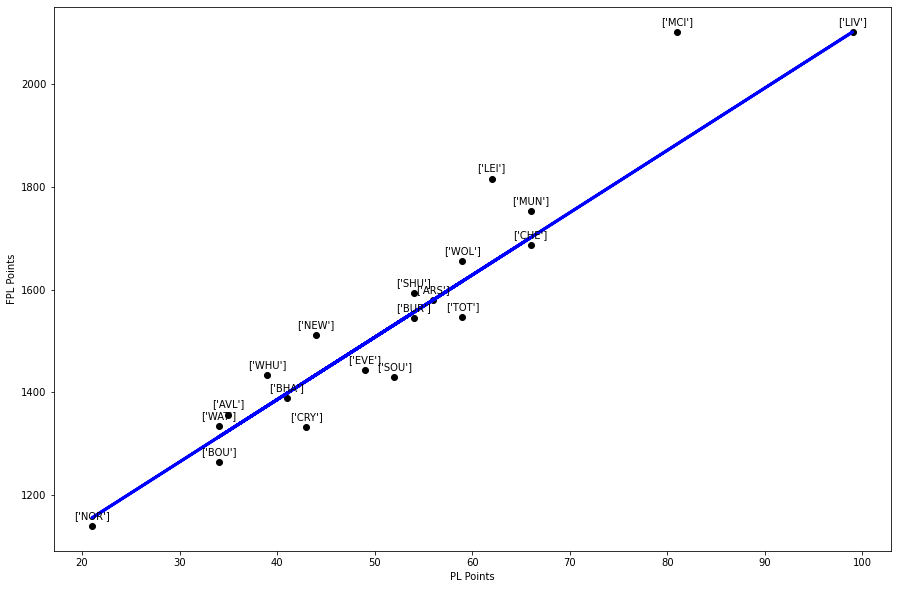

In [177]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(X,y,color='black')
plt.xlabel("PL Points")
plt.ylabel("FPL Points")
plt.plot(X,y_pred2, color='blue', linewidth=3)

for a,b,l in zip(X,y,names):
    plt.annotate(l,(a,b), textcoords="offset points", xytext=(0,7),ha='center')
plt.show()

### R-2 Score for each Algorithm:

In [178]:
from sklearn.metrics import r2_score
print("R-2 Score for Each Algortihm:\n")
print("Multiple Linear Regression: ",r2_score(y, y_pred1))
print("SVR: ",r2_score(y, y_pred2))
print("Decision Tree: ",r2_score(y, y_pred3))
print("Random Forest: ",r2_score(y, y_pred4))

R-2 Score for Each Algortihm:

Multiple Linear Regression:  0.9134372637182558
SVR:  0.9004807525836448
Decision Tree:  0.9903346652429051
Random Forest:  0.9476743304043728


### Comparision of Algorithms

In [179]:
name=[]
arr=[]
arr1=[]
arr2=[]
arr3=[]
arr4=[]
for i in y:
    arr.append(i)
for i in y_pred1:
    arr1.append(i)
for i in y_pred2:
    arr2.append(i)
for i in y_pred3:
    arr3.append(i)
for i in y_pred4:
    arr4.append(i)
for i in names:
    name.append(i)

In [180]:
datafr=pd.DataFrame({"Name":name,"Total Pts":arr,"Total Pts Predicted by Lin Reg":arr1,"Total Pts Predicted by SVR":arr2,
                     "Total Pts Predicted by Dec. Tree":arr3,"Total Pts Predicted by Random Forest":arr4})

In [181]:
datafr

,Name,Total Pts,Total Pts Predicted by Lin Reg,Total Pts Predicted by SVR,Total Pts Predicted by Dec. Tree,Total Pts Predicted by Random Forest
0,[ARS],[1580],[1599.1978410075299],1579.900000,1580.0,1572.690000
1,[AVL],[1357],[1315.7104351302723],1325.360465,1357.0,1342.219500
2,[BOU],[1265],[1302.211034850403],1313.239535,1299.5,1310.939500
3,[BHA],[1389],[1396.7068368094888],1398.086047,1389.0,1396.180000
4,[BUR],[1544],[1572.199040447791],1555.658140,1569.0,1548.038333
5,[CHE],[1687],[1734.1918438062237],1701.109302,1719.5,1729.224167
6,[CRY],[1333],[1423.7056373692276],1422.327907,1333.0,1390.830000
7,[EVE],[1444],[1504.702039048444],1495.053488,1444.0,1444.880000
8,[LEI],[1816],[1680.194242686746],1652.625581,1816.0,1736.328333
9,[LIV],[2101],[2179.672053041914],2101.100000,2101.0,2036.260833


### In the above dataframe, we can see the different Predicted Points results by using multiple regression models

### Sorting the clubs by the total number of FPL points:

In [182]:
datafr.sort_values('Total Pts',ascending=False)

,Name,Total Pts,Total Pts Predicted by Lin Reg,Total Pts Predicted by SVR,Total Pts Predicted by Dec. Tree,Total Pts Predicted by Random Forest
9,[LIV],[2101],[2179.672053041914],2101.100000,2101.0,2036.260833
10,[MCI],[2100],[1936.6828480042645],1882.923256,2100.0,1934.311667
8,[LEI],[1816],[1680.194242686746],1652.625581,1816.0,1736.328333
11,[MUN],[1752],[1734.1918438062237],1701.109302,1719.5,1729.224167
5,[CHE],[1687],[1734.1918438062237],1701.109302,1719.5,1729.224167
19,[WOL],[1655],[1639.6960418471378],1616.262791,1601.0,1605.180000
14,[SHU],[1594],[1572.199040447791],1555.658140,1569.0,1548.038333
0,[ARS],[1580],[1599.1978410075299],1579.900000,1580.0,1572.690000
16,[TOT],[1547],[1639.6960418471378],1616.262791,1601.0,1605.180000
4,[BUR],[1544],[1572.199040447791],1555.658140,1569.0,1548.038333


### Sorting the clubs by the total FPL points predicted using Linear Regression:

In [183]:
datafr.sort_values('Total Pts Predicted by Lin Reg',ascending=False)

,Name,Total Pts,Total Pts Predicted by Lin Reg,Total Pts Predicted by SVR,Total Pts Predicted by Dec. Tree,Total Pts Predicted by Random Forest
9,[LIV],[2101],[2179.672053041914],2101.100000,2101.0,2036.260833
10,[MCI],[2100],[1936.6828480042645],1882.923256,2100.0,1934.311667
11,[MUN],[1752],[1734.1918438062237],1701.109302,1719.5,1729.224167
5,[CHE],[1687],[1734.1918438062237],1701.109302,1719.5,1729.224167
8,[LEI],[1816],[1680.194242686746],1652.625581,1816.0,1736.328333
16,[TOT],[1547],[1639.6960418471378],1616.262791,1601.0,1605.180000
19,[WOL],[1655],[1639.6960418471378],1616.262791,1601.0,1605.180000
0,[ARS],[1580],[1599.1978410075299],1579.900000,1580.0,1572.690000
4,[BUR],[1544],[1572.199040447791],1555.658140,1569.0,1548.038333
14,[SHU],[1594],[1572.199040447791],1555.658140,1569.0,1548.038333


### Sorting the clubs by the total FPL points predicted using SVR:

In [184]:
datafr.sort_values('Total Pts Predicted by SVR',ascending=False)

,Name,Total Pts,Total Pts Predicted by Lin Reg,Total Pts Predicted by SVR,Total Pts Predicted by Dec. Tree,Total Pts Predicted by Random Forest
9,[LIV],[2101],[2179.672053041914],2101.100000,2101.0,2036.260833
10,[MCI],[2100],[1936.6828480042645],1882.923256,2100.0,1934.311667
11,[MUN],[1752],[1734.1918438062237],1701.109302,1719.5,1729.224167
5,[CHE],[1687],[1734.1918438062237],1701.109302,1719.5,1729.224167
8,[LEI],[1816],[1680.194242686746],1652.625581,1816.0,1736.328333
16,[TOT],[1547],[1639.6960418471378],1616.262791,1601.0,1605.180000
19,[WOL],[1655],[1639.6960418471378],1616.262791,1601.0,1605.180000
0,[ARS],[1580],[1599.1978410075299],1579.900000,1580.0,1572.690000
4,[BUR],[1544],[1572.199040447791],1555.658140,1569.0,1548.038333
14,[SHU],[1594],[1572.199040447791],1555.658140,1569.0,1548.038333


### Sorting the clubs by the total FPL points predicted using Decision Tree:

In [185]:
datafr.sort_values('Total Pts Predicted by Dec. Tree',ascending=False)

,Name,Total Pts,Total Pts Predicted by Lin Reg,Total Pts Predicted by SVR,Total Pts Predicted by Dec. Tree,Total Pts Predicted by Random Forest
9,[LIV],[2101],[2179.672053041914],2101.100000,2101.0,2036.260833
10,[MCI],[2100],[1936.6828480042645],1882.923256,2100.0,1934.311667
8,[LEI],[1816],[1680.194242686746],1652.625581,1816.0,1736.328333
11,[MUN],[1752],[1734.1918438062237],1701.109302,1719.5,1729.224167
5,[CHE],[1687],[1734.1918438062237],1701.109302,1719.5,1729.224167
16,[TOT],[1547],[1639.6960418471378],1616.262791,1601.0,1605.180000
19,[WOL],[1655],[1639.6960418471378],1616.262791,1601.0,1605.180000
0,[ARS],[1580],[1599.1978410075299],1579.900000,1580.0,1572.690000
4,[BUR],[1544],[1572.199040447791],1555.658140,1569.0,1548.038333
14,[SHU],[1594],[1572.199040447791],1555.658140,1569.0,1548.038333


### Sorting the clubs by the total FPL points predicted using Random Forest:

In [186]:
datafr.sort_values('Total Pts Predicted by Random Forest',ascending=False)

,Name,Total Pts,Total Pts Predicted by Lin Reg,Total Pts Predicted by SVR,Total Pts Predicted by Dec. Tree,Total Pts Predicted by Random Forest
9,[LIV],[2101],[2179.672053041914],2101.100000,2101.0,2036.260833
10,[MCI],[2100],[1936.6828480042645],1882.923256,2100.0,1934.311667
8,[LEI],[1816],[1680.194242686746],1652.625581,1816.0,1736.328333
11,[MUN],[1752],[1734.1918438062237],1701.109302,1719.5,1729.224167
5,[CHE],[1687],[1734.1918438062237],1701.109302,1719.5,1729.224167
16,[TOT],[1547],[1639.6960418471378],1616.262791,1601.0,1605.180000
19,[WOL],[1655],[1639.6960418471378],1616.262791,1601.0,1605.180000
0,[ARS],[1580],[1599.1978410075299],1579.900000,1580.0,1572.690000
4,[BUR],[1544],[1572.199040447791],1555.658140,1569.0,1548.038333
14,[SHU],[1594],[1572.199040447791],1555.658140,1569.0,1548.038333


## Thank You!